1. Using sklearn library import the digits datasets (i.e. through load_digits()). It is a 8 x 8 pixel images dataset and they are 64-dimensional. In order to retrieve some of the intuition behind the relationship between these points, make use of PCA to reduce the dimension to a manageable number of dimensions (i.e., 2). After reducing the dimension plot them using scatter plots with cmap.

2. How many number of components will be ideal is an important part of using PCA. Using this data plot the cumulative explained variance ratio as a function of the number of components.  

3. Try to reconstruct the data using the largest subset of principal components. The idea behind this is that any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. Add some random noise to the dataset and replot it. 


In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
digits = datasets.load_digits()

## Q1)

In [8]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components=20)
pca_digits = pca.fit_transform(digits.data)

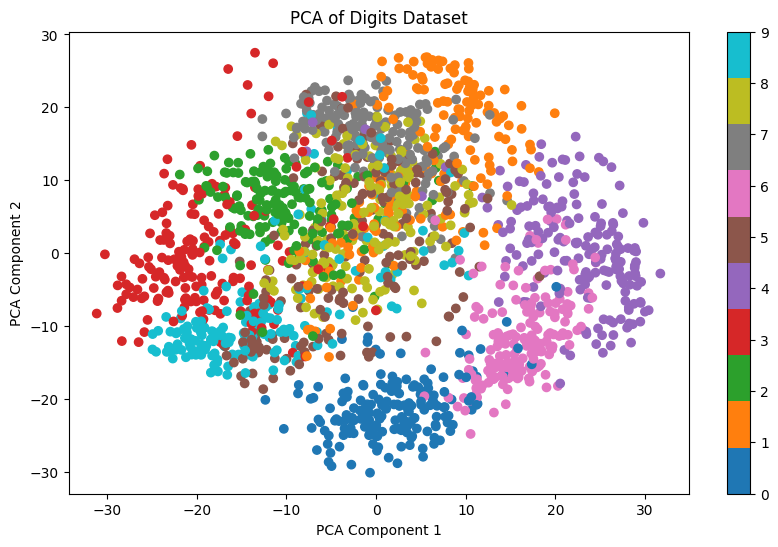

In [42]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_digits[:,0], pca_digits[:,1], c=digits.target, cmap='tab10')
plt.colorbar(scatter)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Digits Dataset')
plt.show()

## Q2)

In [43]:
pca2 = PCA()
pca2.fit(digits.data)

PCA()

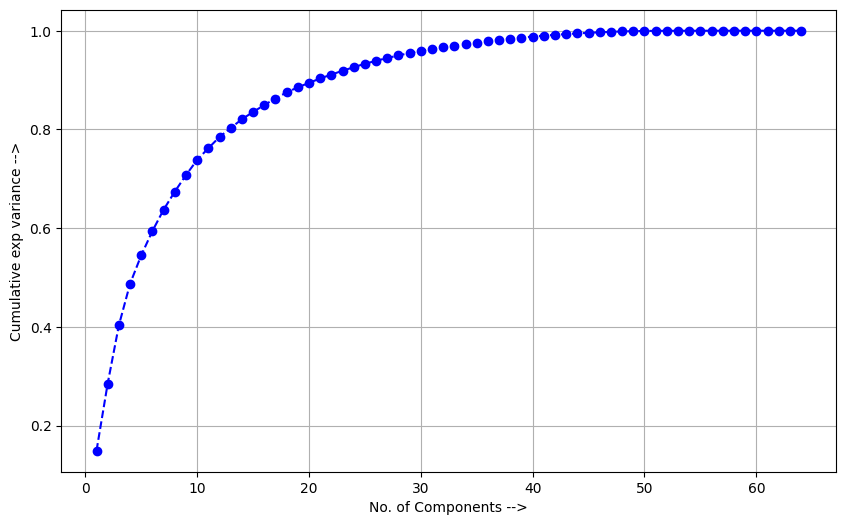

In [44]:
cumulative_explained_variance = np.cumsum(pca2.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel('No. of Components -->')
plt.ylabel('Cumulative exp variance -->')
plt.grid(True)
plt.show()

### On analysing the above graph, we can say that 64 components/dimensions will define the dataset in best possible way.

## Q3)

In [69]:
X = digits.data
pca = PCA(n_components=20)
pca_digits = pca.fit_transform(X)
# Reconstruct the data from the reduced components
X_reconstructed = pca.inverse_transform(pca_digits)

In [67]:
# Add random noise to the dataset
noise = np.random.normal(0, 4, X.shape)
X_noisy = X + noise

# Reduce and reconstruct the noisy data
X_noisy_reduced = pca.transform(X_noisy)
X_noisy_reconstructed = pca.inverse_transform(X_noisy_reduced)

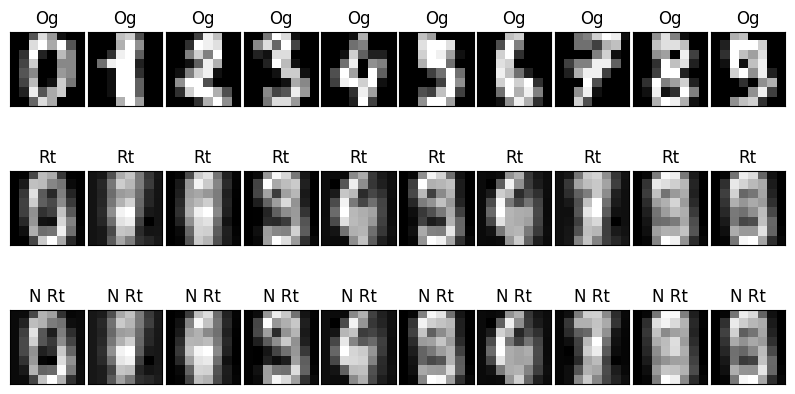

In [68]:
# Plot the original, reconstructed, and noisy reconstructed images for comparison
fig, axes = plt.subplots(3, 10, figsize=(10, 5),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.3, wspace=0.05))

# Plot original images
for i, ax in enumerate(axes[0]):
    ax.imshow(X[i].reshape(8, 8), cmap='gray')
    ax.set_title('Og')

# Plot reconstructed images
for i, ax in enumerate(axes[1]):
    ax.imshow(X_reconstructed[i].reshape(8, 8), cmap='gray')
    ax.set_title('Rt')

# Plot noisy reconstructed images
for i, ax in enumerate(axes[2]):
    ax.imshow(X_noisy_reconstructed[i].reshape(8, 8), cmap='gray')
    ax.set_title('N Rt')

plt.show()